# Income Prediction Using Census Data (Machine Learning Project)

In [21]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

This project uses the U.S. Census Adult dataset to build a machine learning model that predicts whether an individual's annual income exceeds \$50,000. The notebook includes exploratory data analysis (EDA), data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation using Logistic Regression and Random Forest classifiers.

The goal of this project is to understand the socioeconomic factors associated with higher income levels and to build a predictive model that generalizes well to unseen data.



### **What This Project Demonstrates**

- **End-to-end ML pipeline design**, including data cleaning, feature engineering, preprocessing, model selection, tuning, and evaluation  
- **Handling of structured/tabular data**, including one-hot encoding for high-cardinality categoricals and standardized scaling for numeric features  
- **Bias-aware classification modeling**, accounting for class imbalance using `class_weight="balanced"`  
- **Comparative modeling across linear and nonlinear families**, including Logistic Regression and Random Forests  
- **Model selection** using 5-fold cross-validated GridSearch with multiple hyperparameters  
- **Interpretability at scale**, with feature importances, ROC curves, confusion matrices, and threshold-sensitive metrics  


## Part 1: Build DataFrame



#### Load a Data Set and Save it as a Pandas DataFrame


We load the 1994 Adult Census dataset, which contains demographic and employment-related attributes for individuals. The target variable is whether the person's income is `<=50K` or `>50K`.

In [22]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Before models, I frame the learning problem:

- **Dataset:** 1994 U.S. Census “Adult” dataset  
- **Prediction target:** `income_binary` – whether an individual’s annual income is `<=50K` or `>50K`  
- **Learning setup:** Supervised learning, binary classification  
- **Feature types:**  
  - **Numeric features** such as `age`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week`  
  - **Categorical features** such as `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex_selfID`, and `native-country`  





A dependable income-prediction model would help policy makers, business leaders with resource allocation, financial support targeting, study of socio-economic patterns, in addition to being a testbed for fairness and bias mitigation.



## Part 3: Understand Your Data

## Exploratory Data Analysis (EDA) and Data Quality Checks

Here I perform exploratory data analysis with the goal of understanding both **what** is in the dataset and **how clean** it is:

1. **Schema and types:** Use `df.info()` to inspect column types and non-null counts, confirming which variables are numeric and which are categorical.  
2. **Missing values:** The dataset encodes missing entries using the placeholder `"?"`. I first count how frequent this placeholder is, then replace it with proper `NaN` values and summarize missingness by column.  
3. **Label distribution:** I examine the distribution of `income_binary` to see how imbalanced the classes are (most individuals earn `<=50K`, with a smaller but important minority earning `>50K`).  
4. **Numeric distributions:** Using `describe()` and Seaborn histograms, I visualize the distributions of key numeric features such as `age`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week` to spot skew, outliers, and typical ranges.  
5. **Categorical overview:** For each major categorical feature (workclass, education, marital status, occupation, relationship, race, sex, native country), I display the most common categories to understand dominant groups and sparsity.

This EDA step shapes my preprocessing strategy: I confirm where I need imputation, recognize which features are highly skewed, and better understand how the dataset might influence model performance and fairness.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB
‘?’ counts:
 age               0
workclass         0
fnlwgt     

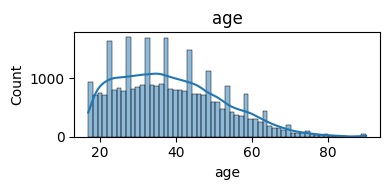

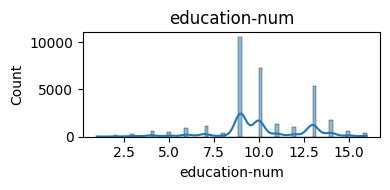

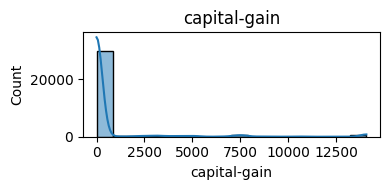

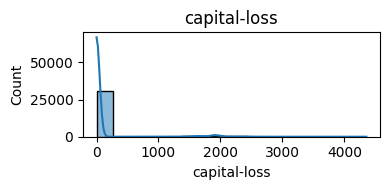

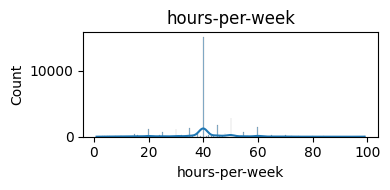

In [23]:

df.info()
print("‘?’ counts:\n", df.isin(['?']).sum())
df = df.replace('?', np.nan)
print("NaNs after replace:\n", df.isna().sum().sort_values(ascending=False).head(10))


print(df['income_binary'].value_counts(normalize=True))


print(df[['age','education-num','capital-gain','capital-loss','hours-per-week']].describe())


import matplotlib.pyplot as plt
import seaborn as sns

for col in ['age','education-num','capital-gain','capital-loss','hours-per-week']:
    plt.figure(figsize=(4,2))
    sns.histplot(df[col].dropna(), kde=True).set_title(col)
    plt.tight_layout()


for col in ['workclass','education','marital-status','occupation','relationship','race','sex_selfID','native-country']:
    print(col, df[col].value_counts().head(5), "\n")


## Part 4: Define Project Plan

I select key numerical and categorical features, handle missing data, and apply encoding + scaling.  
For modeling, I start with Logistic Regression and Random Forest, then evaluate and tune them using cross-validation and standard metrics such as F1-score and ROC-AUC. 

## Part 5: Model Implementation, Optimization, and Evaluation

With the data pipeline and strategy established, I implement the full preprocessing workflow and train the initial models. The pipeline handles imputation, encoding, and scaling, ensuring all transformations are applied consistently across training and test sets.

I begin by training a baseline Logistic Regression model, followed by a Random Forest classifier to compare linear versus non-linear performance. After evaluating the baseline results, I apply hyperparameter tuning using GridSearchCV to refine model parameters such as regularization strength for Logistic Regression and tree depth or number of estimators for Random Forest.

Model performance is evaluated across multiple metrics,precision, recall, F1-score, ROC-AUC,and visualized using confusion matrices and ROC curves to compare trade-offs between correctly identifying high-income individuals versus avoiding false positives.

Finally, I examine feature importances (via Random Forest) to understand which predictors have the strongest influence on income classification. This not only provides interpretability but also validates whether the model’s behavior aligns with real-world socioeconomic trends. The results of this process help determine the most effective model for the task and reveal actionable insights derived from the data.

In [24]:
# 5.1 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


df = df.replace('?', np.nan)
df = df.drop(columns=['fnlwgt','education'])
df = df.rename(columns={'sex_selfID':'sex'})

X = df.drop('income_binary', axis=1)
y = df['income_binary'].map({'<=50K':0, '>50K':1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


num_cols = ['age','education-num','capital-gain','capital-loss','hours-per-week']
cat_cols = [c for c in X.columns if c not in num_cols]

num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    # use sparse_output=False in newer sklearn
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])


pipe_lr = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=500, class_weight='balanced'))
])
pipe_lr.fit(X_train, y_train)


y_pred = pipe_lr.predict(X_test)
print("Baseline Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC‑AUC:", roc_auc_score(y_test, pipe_lr.predict_proba(X_test)[:,1]))


param_grid_lr = {'clf__C':[0.01,0.1,1,10]}
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Tuned LR Best Params:", grid_lr.best_params_)
print("Tuned LR CV F1:", grid_lr.best_score_)
y_pred_tuned = grid_lr.predict(X_test)
print(classification_report(y_test, y_pred_tuned))
print("Tuned LR ROC‑AUC:", roc_auc_score(y_test, grid_lr.predict_proba(X_test)[:,1]))


pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])
rf_cv = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='roc_auc')
print("RF CV ROC‑AUC:", rf_cv.mean())

pipe_rf.fit(X_train, y_train)
print("RF Test ROC‑AUC:", roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:,1]))




Baseline Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4945
           1       0.57      0.85      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513

ROC‑AUC: 0.9067994108664701
Tuned LR Best Params: {'clf__C': 1}
Tuned LR CV F1: 0.6790150392189924
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4945
           1       0.57      0.85      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513

Tuned LR ROC‑AUC: 0.9067994108664701
RF CV ROC‑AUC: 0.8913960918745951
RF Test ROC‑AUC: 0.8943715694063268


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4945
           1       0.57      0.85      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513

ROC‑AUC: 0.9067994108664701

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4945
           1       0.69      0.64      0.66      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513

ROC‑AUC: 0.8943715694063268

=== Tuned Logistic Regression ===
Best params: {'clf__C': 1}
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4945
           1       0.57      0.85      0.68      1568

    accuracy 

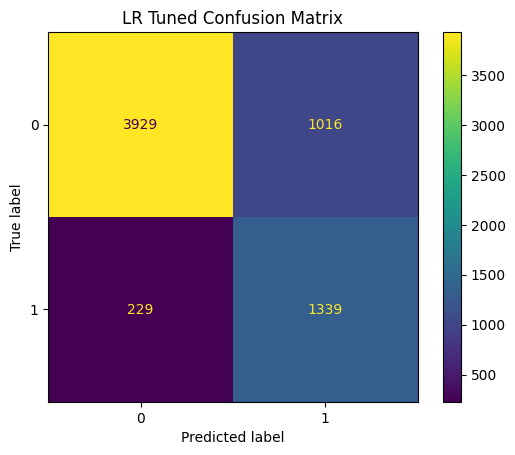

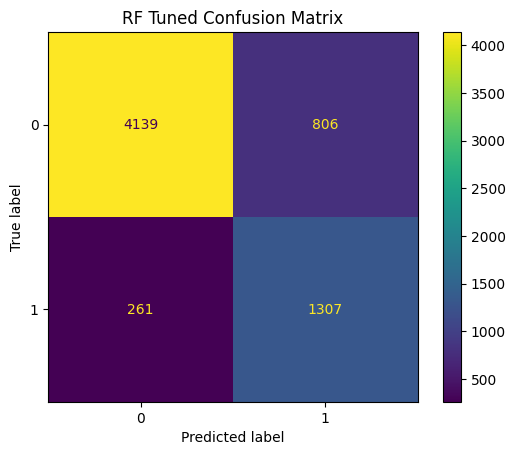

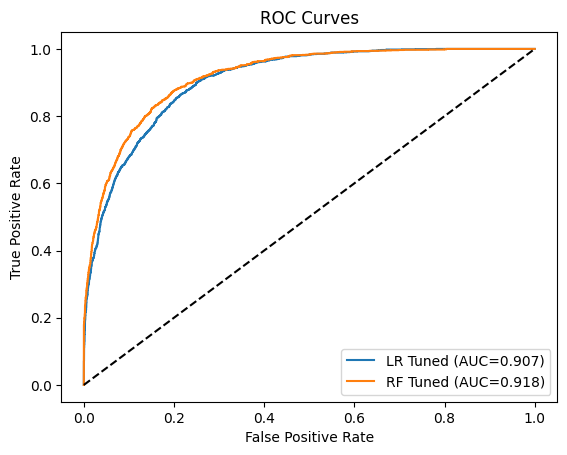

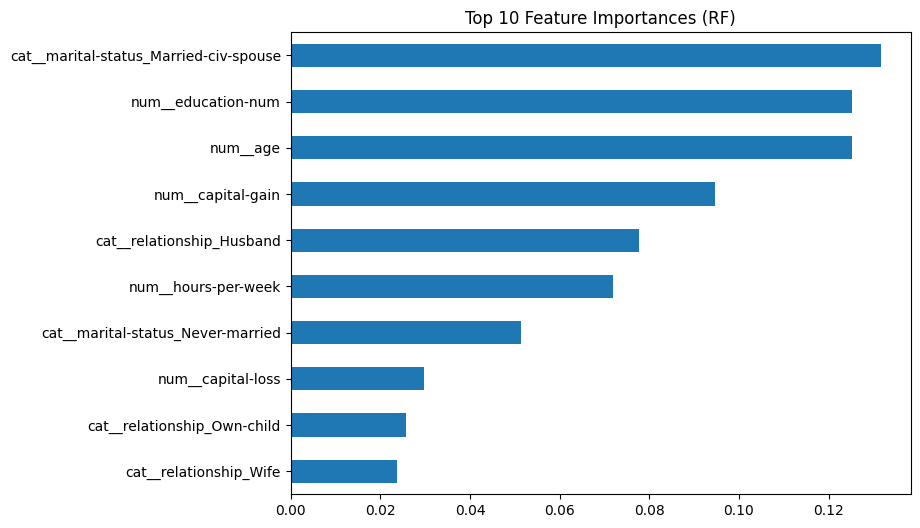

In [25]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)


df = df.replace('?', np.nan)
# drop if present; errors='ignore' prevents KeyError
df.drop(columns=['fnlwgt','education'], errors='ignore', inplace=True)
df.rename(columns={'sex_selfID':'sex'}, inplace=True)


X = df.drop('income_binary', axis=1)
y = df['income_binary'].map({'<=50K': 0, '>50K': 1})


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


num_cols = ['age','education-num','capital-gain','capital-loss','hours-per-week']
cat_cols = [c for c in X.columns if c not in num_cols]

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])


lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=500, class_weight='balanced'))
])
lr_pipeline.fit(X_train, y_train)
y_pred_lr  = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("ROC‑AUC:", roc_auc_score(y_test, y_proba_lr))

# --- 6.6 Baseline Random Forest ---
rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf  = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC‑AUC:", roc_auc_score(y_test, y_proba_rf))


param_grid_lr = {'clf__C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
y_pred_lr_tuned  = best_lr.predict(X_test)
y_proba_lr_tuned = best_lr.predict_proba(X_test)[:,1]

print("\n=== Tuned Logistic Regression ===")
print("Best params:", grid_lr.best_params_)
print(classification_report(y_test, y_pred_lr_tuned))
print("ROC‑AUC:", roc_auc_score(y_test, y_proba_lr_tuned))


param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf_tuned  = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)[:,1]

print("\n=== Tuned Random Forest ===")
print("Best params:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf_tuned))
print("ROC‑AUC:", roc_auc_score(y_test, y_proba_rf_tuned))


for name, model in [("LR Tuned", best_lr), ("RF Tuned", best_rf)]:
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()


plt.figure()
for name, proba in [("LR Tuned", y_proba_lr_tuned), ("RF Tuned", y_proba_rf_tuned)]:
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


importances = pd.Series(
    best_rf.named_steps['clf'].feature_importances_,
    index=best_rf.named_steps['prep'].get_feature_names_out()
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (RF)")
plt.show()











